In [31]:
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns # Easier syntax for writing matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/ppd_data.csv')
df['Date_order'] = np.arange(1, len(df)+1)
print(df)

                                         ID    Price        Date Postcode  \
0      6CBAE435-1794-45A6-A979-7B186E2EF585   300000  10/04/2013  HA5 4AJ   
1      E2D1EFBA-3896-48A8-82E2-FEFFBAA199CE  1995000  01/12/2014  HA6 2AR   
2      6AC99725-860D-4F07-860E-2D763226DB32   685000  01/11/2010  HA6 2AR   
3      87682AF9-4131-4AD8-98E2-7EEE7A637833   850000  04/10/2010  HA6 2AR   
4      1DF267B4-218E-4E45-8C25-6D1B8AF9DF59  1150000  08/12/2011  HA6 2AR   
...                                     ...      ...         ...      ...   
14816  FFA361DB-7C39-8A03-E053-4804A8C01F61   700000  24/05/2023      NaN   
14817  13C5365C-2DDB-4325-A2AF-961BFBE60AFC   400000  06/12/2013      NaN   
14818  DBA933FA-710F-669D-E053-6B04A8C0AD56   462500  02/12/2021      NaN   
14819  93E6821F-2B17-40FD-E053-6B04A8C0C1DF    14500  12/09/2019      NaN   
14820  64342BFF-4C43-422C-E053-6C04A8C0FB8A  6047827  16/11/2017      NaN   

      Type NewBuild Estate              Address1         Address2  \
0     

In [32]:
y = df['Price'].to_numpy().reshape(-1, 1)
X = df['Date_order'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

Coefficients: 
 [[-14.36884793]]
Mean squared error: 703802628973.5526
Coefficient of determination: -0.004410243194115093


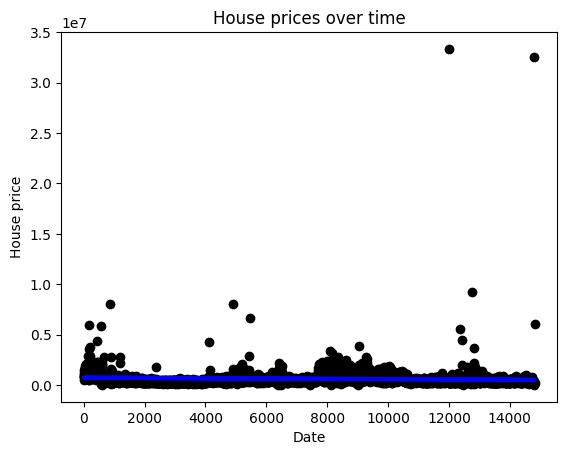

In [33]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('Date')
plt.ylabel('House price')

plt.title('House prices over time')

plt.show()

In [34]:
import statsmodels.api as sm
mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    0.0
Name: P>|t|, dtype: float64

In [37]:
prediction_df = pd.DataFrame()
prediction_df['Date_order'] = np.arange(len(df)+2, len(df)+1000, step=1)
prediction_df['Price'] = regr.predict(np.arange(len(df)+2, len(df)+1000, step=1).reshape(-1, 1))

prediction_df

,Date_order,Price
0,14823,513831.869580
1,14824,513817.500732
2,14825,513803.131884
3,14826,513788.763036
4,14827,513774.394188
...,...,...
993,15816,499563.603584
994,15817,499549.234736
995,15818,499534.865888
996,15819,499520.497040


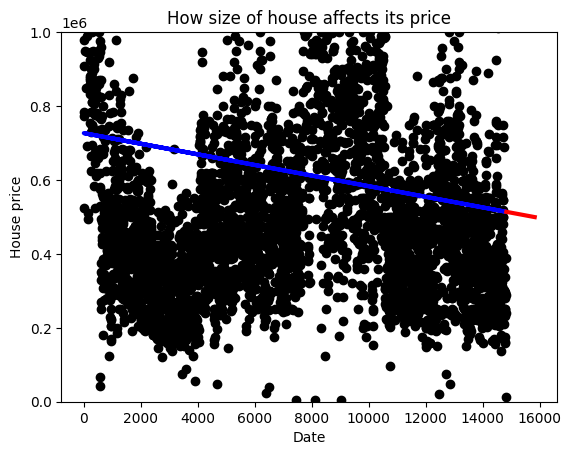

In [41]:
plt.clf() # Clear axes in plt
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('Date')
plt.ylabel('House price')

plt.title('How size of house affects its price')

plt.plot(prediction_df['Date_order'], prediction_df['Price'], color="red", linewidth=3)
plt.axis(ymax=1000000, ymin=0)
plt.show()